<a href="https://colab.research.google.com/github/msc-acse/acse-8-miniproject-sigmoid/blob/yeliu/Hyperparameters_tuning_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up Working Environment

## Sync to GitHub

In [0]:
from getpass import getpass
import os

#checking
user = getpass('github user')
password = getpass('github password')
os.environ['GITHUB_AUTH'] = user + ':' + password

!git clone https://$GITHUB_AUTH@github.com/msc-acse/acse-8-miniproject-sigmoid.git sigmoid

github user··········
github password··········
Cloning into 'sigmoid'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 150 (delta 5), reused 3 (delta 1), pack-reused 135
Receiving objects: 100% (150/150), 24.96 MiB | 29.08 MiB/s, done.
Resolving deltas: 100% (51/51), done.


## Sync to Google Drive

In [0]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


## Install Dependencies and CUDA

In [0]:
%pylab inline
!pip install pycm livelossplot

from livelossplot import PlotLosses
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as transforms
from torchvision import models
import time
import random
import copy

device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Cuda installed! Running on GPU!


## Import Tools to Perform Supervised Learning on KMNIST

In [0]:
%load_ext autoreload
%autoreload 2
from sigmoid.KMNISTLearning import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Define Model Classes
Each model class should include a `forward` method.

In [0]:
class AlexNetMod(nn.Module):

    def __init__(self, num_classes=1000):
        super(AlexNetMod, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 256, kernel_size=4, padding=0, stride=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

# Import Data as `torch.Tensor`

In [0]:
# Import Data
path="sigmoid/data/"
train_data = np.load(path+"kmnist-train-imgs.npy")
test_data = np.load(path+"kmnist-test-imgs.npy")
train_labels = np.load(path+"kmnist-train-labels.npy")
classmap = pd.read_csv(path+"kmnist_classmap.csv")

# Tensor of training data
X = torch.from_numpy(train_data).float()
# Tensor of training labels
y = torch.from_numpy(train_labels).long()
#  Tensor of test data
X_test = torch.from_numpy(test_data).float()

# Size Check
print("Train Data:", X.size())
print("Test Data:", X_test.size())
print("Train Labels:", y.size())

Train Data: torch.Size([60000, 28, 28])
Test Data: torch.Size([10000, 28, 28])
Train Labels: torch.Size([60000])


# Model Training and Saving

## AlexNetMod with PyTorch Augmentation

In [0]:
 weights = [0, 1e-3, 1e-4, 1e-5]

In [0]:
# AlexNetMod with pytorch augmentation
# Hyperparameters
lr = 1e-2
momentum = 0.5
batch_size = 64
test_batch_size = 1000
n_epochs = 30

model = AlexNetMod(num_classes=10)
optimiser = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weights[0])
loss_function = nn.CrossEntropyLoss()

learning = SupervisedLearning(X, y, model, optimiser, loss_function, batch_size, test_batch_size,
                 device=device,
                 transform=True, 
                 seed=42, n_epochs=n_epochs,
                 val_ratio=0.1, n_splits=1, 
                 early_stop = False,
                 patience = 5,
                 tol = 0.001)

t = learning.train_wrapper(train_full=False)
print(t)

In [0]:
# Hyperparameters

lr = 1e-2
momentum = 0.5
batch_size = 64
test_batch_size = 1000
n_epochs = 10

model = AlexNetMod(num_classes=10)
optimiser = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weights[1])
loss_function = nn.CrossEntropyLoss()

learning_1 = SupervisedLearning(X, y, model, optimiser, loss_function, batch_size, test_batch_size,
                 device=device,
                 transform=True, 
                 seed=42, n_epochs=n_epochs,
                 val_ratio=0.1, n_splits=1, 
                 early_stop = False,
                 patience = 5,
                 tol = 0.001)

t = learning_1.train_wrapper(train_full=False)
print(t)

In [0]:
# Hyperparameters

lr = 1e-2
momentum = 0.5
batch_size = 64
test_batch_size = 1000
n_epochs = 10

model = AlexNetMod(num_classes=10)
optimiser = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weights[2])
loss_function = nn.CrossEntropyLoss()

learning_2 = SupervisedLearning(X, y, model, optimiser, loss_function, batch_size, test_batch_size,
                 device=device,
                 transform=True, 
                 seed=42, n_epochs=n_epochs,
                 val_ratio=0.1, n_splits=1, 
                 early_stop = False,
                 patience = 5,
                 tol = 0.001)

t = learning_2.train_wrapper(train_full=False)
print(t)

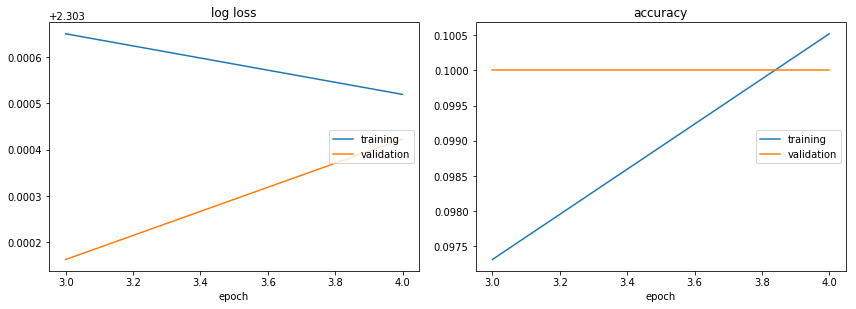

log loss:
training   (min:    2.304, max:   21.033, cur:    2.304)
validation (min:    2.303, max:    2.304, cur:    2.303)

accuracy:
training   (min:    0.097, max:    0.102, cur:    0.101)
validation (min:    0.100, max:    0.100, cur:    0.100)


KeyboardInterrupt: ignored

In [0]:
# Hyperparameters

lr = 1e-2
momentum = 0.5
batch_size = 64
test_batch_size = 1000
n_epochs = 10

model = AlexNetMod(num_classes=10)
optimiser = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weights[3])
loss_function = nn.CrossEntropyLoss()

learning_3 = SupervisedLearning(X, y, model, optimiser, loss_function, batch_size, test_batch_size,
                 device=device,
                 transform=True, 
                 seed=42, n_epochs=n_epochs,
                 val_ratio=0.1, n_splits=1, 
                 early_stop = False,
                 patience = 5,
                 tol = 0.001)

t = learning_3.train_wrapper(train_full=False)
print(t)